In [73]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud

In [121]:
# Function to safely evaluate the string representation of the list of tuples
def safe_eval(str_eval):
    try:
        return ast.literal_eval(str_eval)
    except:
        return []

# Load the dataset
file_path = 'reviews_small_all.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Expanded list of hotel attributes including the new ones
expanded_attributes = [
    'room', 'location', 'staff', 'breakfast', 'bed', 'shower', 'bathroom',
    'facility', 'cleanliness', 'price', 'restaurant', 'bar', 'reception',
    'hotel', 'service', 'amenity', 'comfort', 'quality', 'atmosphere', 'experience',
    'management', 'check-in', 'check-out', 'noise', 'pillow', 'dust', 'key', 'food', 'mattress', 'lobby'
]

In [123]:
# Mapping for lemmatization (plural to singular)
lemmatization_map = {
    'rooms': 'room', 'beds': 'bed', 'showers': 'shower', 'bathrooms': 'bathroom',
    'facilities': 'facility', 'prices': 'price', 'restaurants': 'restaurant',
    'bars': 'bar', 'pillows': 'pillow'
}

# Reinitialize the graph with expanded attributes
G_combined = nx.Graph()

for _, row in df.iterrows():
    keywords_list = safe_eval(row['predicted_keywords'])
    sentiment = row['true_label']
    filtered_keywords = [lemmatization_map.get(kw[0], kw[0]) for kw in keywords_list if lemmatization_map.get(kw[0], kw[0]) in expanded_attributes]

    for keyword in filtered_keywords:
        if keyword not in G_combined:
            G_combined.add_node(keyword, sentiments=set())
        G_combined.nodes[keyword]['sentiments'].add(sentiment)
        for other_keyword in filtered_keywords:
            if keyword != other_keyword and other_keyword in G_combined:
                G_combined.add_edge(keyword, other_keyword)

# Define colors for nodes based on sentiment
def determine_color(sentiments):
    if sentiments == {'positive'}:
        return 'lightgreen'
    elif sentiments == {'negative'}:
        return 'red'
    else:
        return 'lightblue'

# Apply colors to nodes
colors_expanded = [determine_color(G_combined.nodes[node]['sentiments']) for node in G_combined.nodes]


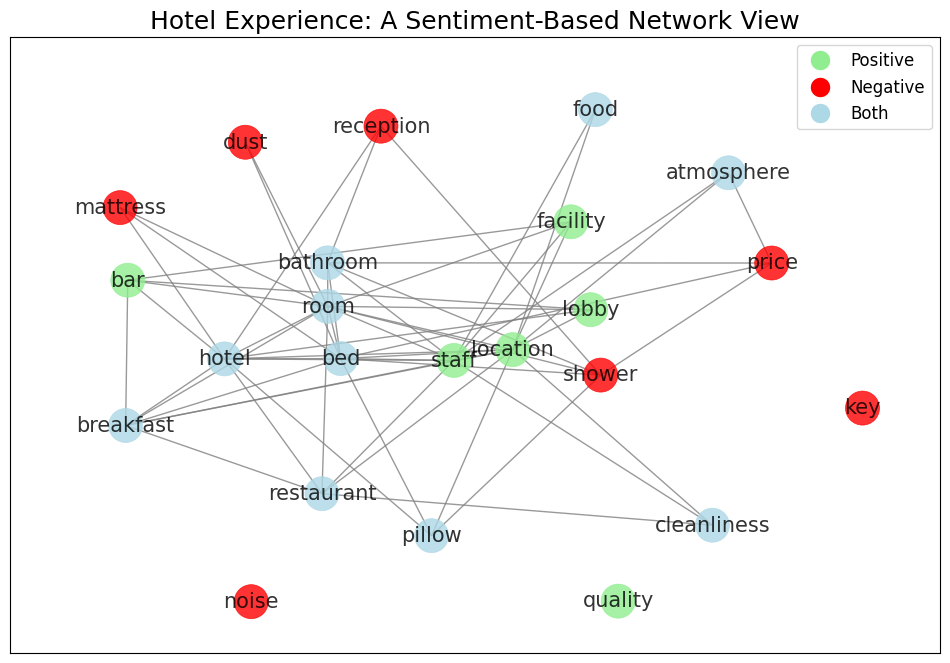

In [124]:
# Draw the network graph with expanded attributes
plt.figure(figsize=(12, 8))
pos_expanded = nx.spring_layout(G_combined, k=1.5)
nx.draw_networkx(G_combined, pos_expanded, node_color=colors_expanded, node_size=600, edge_color='gray', with_labels=True, font_size=15, alpha=0.8, linewidths=0.5)

# Add title and axis labels
plt.title("Hotel Experience: A Sentiment-Based Network View", fontsize=18)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='lightgreen', markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='red', markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Both', markerfacecolor='lightblue', markersize=15)
]
plt.legend(handles=legend_elements, prop={'size': 12})

# Adjust plot margins
plt.margins(0.1)

# Show the plot
plt.show()


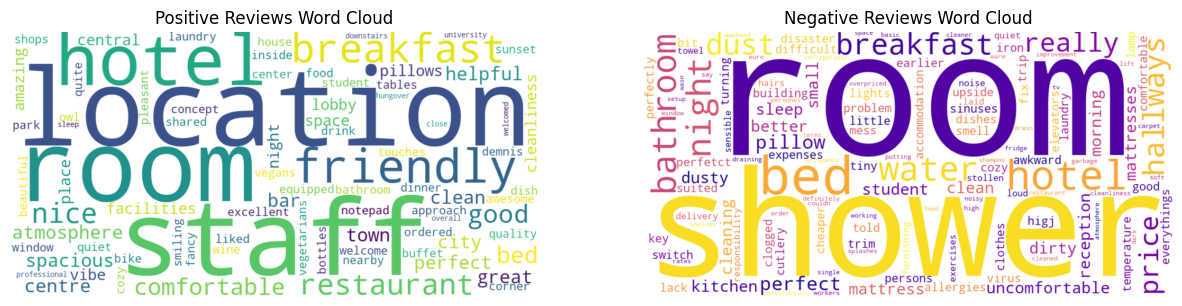

In [125]:
positive_keywords = []
negative_keywords = []

# Extract keywords based on sentiment
for _, row in df.iterrows():
    keywords_list = safe_eval(row['predicted_keywords'])
    if row['true_label'] == 'positive':
        positive_keywords.extend([kw[0] for kw in keywords_list])
    elif row['true_label'] == 'negative':
        negative_keywords.extend([kw[0] for kw in keywords_list])

color_map_positive = "viridis"
color_map_negative = "plasma"

# Generate and display the word clouds with specified color maps
plt.figure(figsize=(15, 7))

# Positive Reviews Word Cloud
if positive_keywords:
    wordcloud_positive = WordCloud(width=1000, height=500, colormap=color_map_positive, background_color='white').generate(' '.join(positive_keywords))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Positive Reviews Word Cloud')
    plt.axis('off')

# Negative Reviews Word Cloud
if negative_keywords:
    wordcloud_negative = WordCloud(width=1000, height=500, colormap=color_map_negative, background_color='white').generate(' '.join(negative_keywords))
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Negative Reviews Word Cloud')
    plt.axis('off')

plt.show()

